In [1]:
import random
import pandas as pd
import matplotlib.pyplot as plt

import ai2thor
import ai2thor_colab
from ai2thor_colab import plot_frames, side_by_side
from ai2thor.controller import Controller

from IPython.display import clear_output

In [2]:
from ai2thor.platform import CloudRendering
controller = Controller(platform=CloudRendering)

## Workspace

In [3]:
floor_index = random.randint(0, 30)
floor_index = 26

controller = Controller(
    agentMode = "default", # arm
    visibilityDistance = 1.5,
    scene = f"FloorPlan{floor_index}",

    # step sizes
    gridSize = 0.25,
    snapToGrid = True,
    rotateStepDegrees = 90,

    # image modalities
    renderInstanceSegmentation = False,
    renderDepthImage = False,
    renderSemanticSegmentation = False,
    renderNormalsImage = False,
    
    # camera properties
    width = 1200,
    height = 800,
    fieldOfView = 120
)

In [4]:
w = "MoveAhead"
a = "MoveLeft"
s = "MoveBack"
d = "MoveRight"

l = "RotateLeft"
r = "RotateRight"

Robot position BEFORE: {'x': -0.5, 'y': 0.9015909433364868, 'z': 1.5}
Robot position AFTER: {'x': -0.5, 'y': 0.9015909433364868, 'z': 1.5}


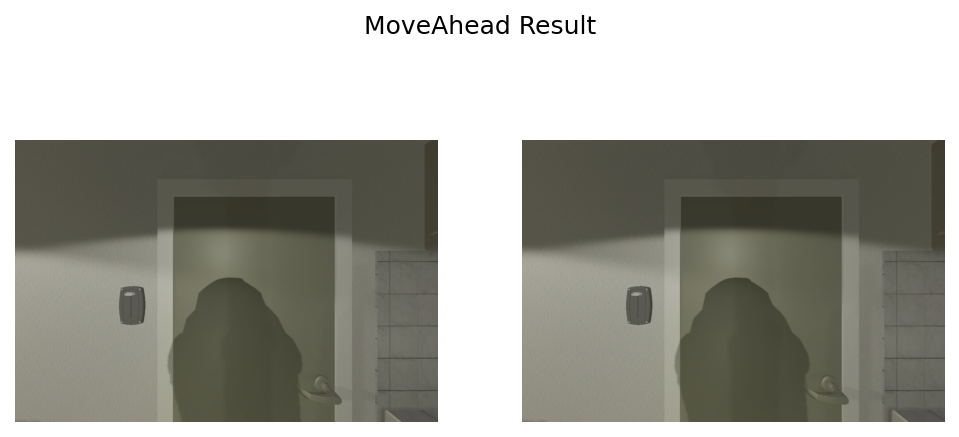

In [24]:
command = w

try:
    robot_position = controller.step(command).metadata["agent"]["position"]
    print("Robot position BEFORE:", robot_position)
except:
    pass

event = controller.step(command)

side_by_side(
    frame1 = controller.last_event.frame,
    frame2 = event.frame,
    title = f"{command} Result"
)

robot_position = event.metadata["agent"]["position"]
print("Robot position AFTER:", robot_position)

## Display Data

In [25]:
data = controller.last_event.metadata['objects']

df_data = pd.DataFrame(data)
df_data[(df_data['name'] == 'Toaster_70e5cd67') | (df_data['name'] == 'CoffeeMachine_95f5a8d0') | 
        (df_data['name'] == 'Microwave_d485f342') | (df_data['name'] == 'Fridge_a2da9221') | 
        (df_data['name'] == 'LightSwitch_186a463a')]

# df_data

,name,position,rotation,visible,isInteractable,receptacle,toggleable,isToggled,breakable,isBroken,...,receptacleObjectIds,distance,objectType,objectId,assetId,parentReceptacles,controlledObjects,isMoving,axisAlignedBoundingBox,objectOrientedBoundingBox
27,Toaster_70e5cd67,"{'x': -0.28601884841918945, 'y': 0.86153364181...","{'x': -3.438547719269991e-05, 'y': 269.9967346...",False,False,True,True,False,False,False,...,[],2.032691,Toaster,Toaster|-00.29|+00.86|+03.52,Toaster_26,[DiningTable|-00.49|00.00|+03.18],[],False,"{'cornerPoints': [[-0.12858232855796814, 1.042...","{'cornerPoints': [[-0.48862898349761963, 0.861..."
33,LightSwitch_186a463a,"{'x': -0.06499999761581421, 'y': 1.44799995422...","{'x': -0.0, 'y': 270.0, 'z': 0.0}",True,True,False,True,True,False,False,...,None,0.857203,LightSwitch,LightSwitch|-00.07|+01.45|+02.00,Light_Switch_26,None,[],False,"{'cornerPoints': [[-0.06499999016523361, 1.550...",None
40,Fridge_a2da9221,"{'x': -2.802000045776367, 'y': 0.0, 'z': 4.427...","{'x': -0.0, 'y': 90.0, 'z': -0.0}",False,False,True,False,False,False,False,...,"[Lettuce|-02.84|+00.37|+04.63, Egg|-02.75|+00....",3.831371,Fridge,Fridge|-02.80|+00.00|+04.43,Fridge_26,[Floor|-00.05|+00.00|+00.00],None,False,"{'cornerPoints': [[-2.399796962738037, 1.75585...",None
45,Microwave_d485f342,"{'x': -0.39188167452812195, 'y': 0.91701620817...","{'x': 7.039623710625165e-07, 'y': 0.0086580663...",False,False,True,True,False,False,False,...,[],1.280801,Microwave,Microwave|-00.39|+00.92|+00.22,Microwave_26,[CounterTop|-01.37|+00.95|+00.35],[],False,"{'cornerPoints': [[-0.08913052082061768, 1.313...","{'cornerPoints': [[-0.08913028240203857, 0.917..."
46,CoffeeMachine_95f5a8d0,"{'x': -2.9382107257843018, 'y': 0.925372481346...","{'x': 0.0027945146430283785, 'y': 89.642532348...",False,False,True,True,False,False,False,...,[],3.221816,CoffeeMachine,CoffeeMachine|-02.94|+00.93|+03.61,coffee_machine_26,[CounterTop|-02.78|+00.97|+03.49],[],False,"{'cornerPoints': [[-2.6543664932250977, 1.3359...","{'cornerPoints': [[-2.6529462337493896, 0.9253..."


---